### Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load iris dataset

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

### Features

In [5]:
features = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

In [6]:
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Target

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
target = pd.DataFrame(iris.target, columns=["species"])

In [9]:
target

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [10]:
df = pd.concat([features , target], axis=1)

In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Analyze the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
df["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

### Exploratory Data Analysis

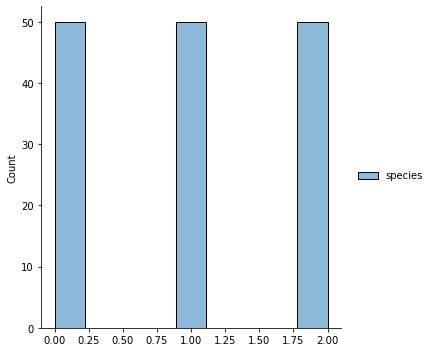

In [16]:
sns.displot(target)

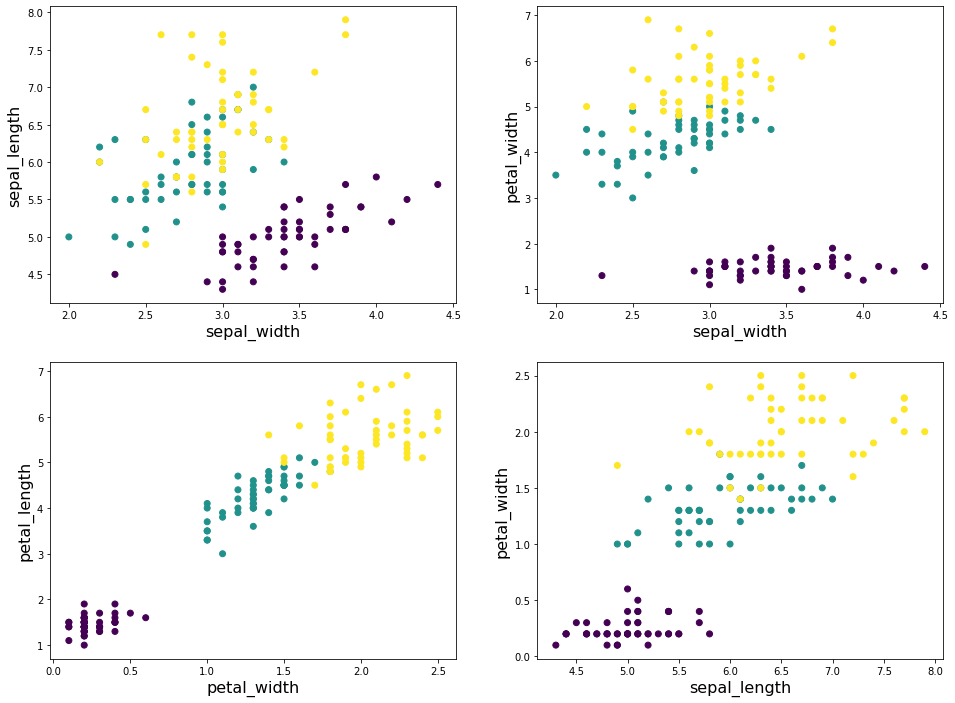

In [17]:
fig, axes = plt.subplots(2,2, figsize=(16,12))

axes[0][0].scatter(df["sepal_width"], df["sepal_length"], c=df["species"])
axes[0][0].set_xlabel("sepal_width", size=16)
axes[0][0].set_ylabel("sepal_length", size=16)

axes[1][0].scatter(df["petal_width"], df["petal_length"], c=df["species"])
axes[1][0].set_xlabel("petal_width", size=16)
axes[1][0].set_ylabel("petal_length", size=16)

axes[0][1].scatter(df["sepal_width"], df["petal_length"], c=df["species"])
axes[0][1].set_xlabel("sepal_width", size=16)
axes[0][1].set_ylabel("petal_width", size=16)

axes[1][1].scatter(df["sepal_length"], df["petal_width"], c=df["species"])
axes[1][1].set_xlabel("sepal_length", size=16)
axes[1][1].set_ylabel("petal_width", size=16)

plt.show()

Ther is a linear correlation between petal length and petal width.

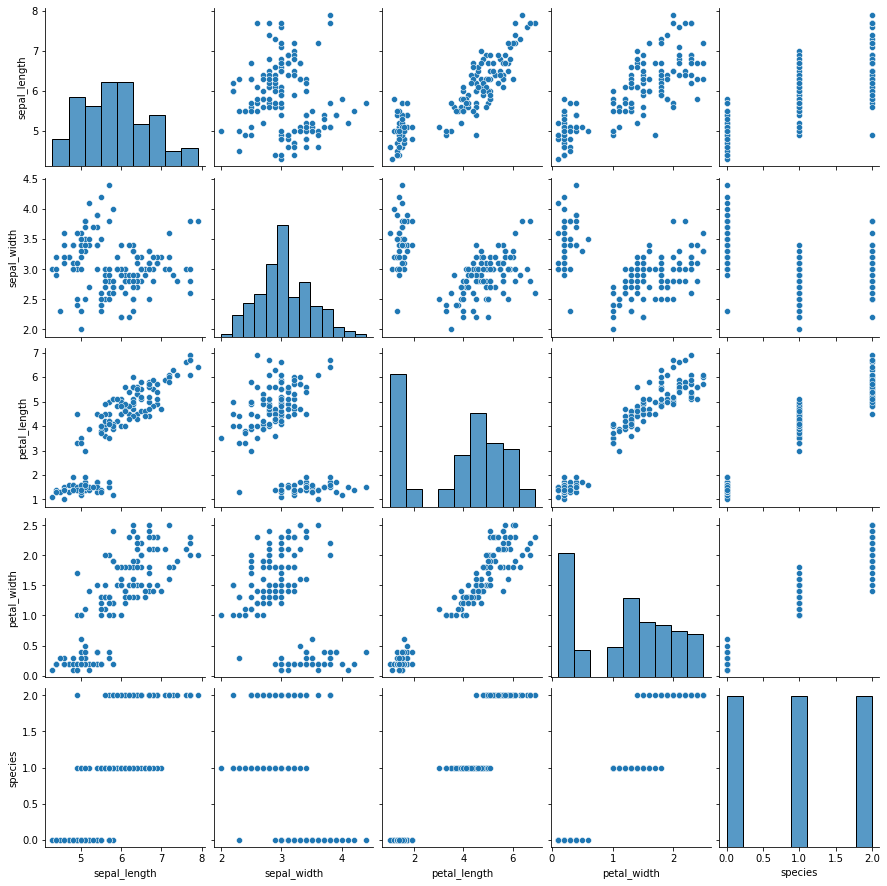

In [18]:
sns.pairplot(df)

In [19]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#### Split the data into training and testing datasets

In [20]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Features Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### Accuracy

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(y_test, y_pred)

In [34]:
print("Accuracy : ",round(score*100, 2))

Accuracy :  91.11


#### Confusion Matrix

In [25]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0,  9,  4],
       [ 0,  0, 13]], dtype=int64)

#### Classification Report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.69      0.82        13
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



### Find the optimal valu of K

In [27]:
k_range  = range(1,20)
error_rate = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    error = np.mean(y_pred_knn != y_test)
    error_rate.append(error)

Text(0, 0.5, 'Error Rate')

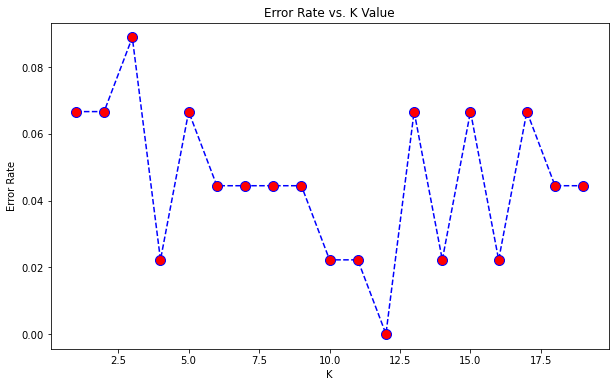

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

At k = 12, we get low error

In [29]:
from sklearn.neighbors import KNeighborsClassifier

model_2 = KNeighborsClassifier(n_neighbors=12)

model_2.fit(X_train, y_train)

y_pred_2 = model_2.predict(X_test)

#### Accuracy

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score2 = accuracy_score(y_test, y_pred_2)

In [31]:
print("Accuracy : ",round(score2*100, 2))

Accuracy :  100.0


#### Confusion Matrix

In [32]:
confusion_matrix(y_test, y_pred_2)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

#### Classification Report

In [33]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

